In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('titanic_train.csv')

In [55]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.050,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.000,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.275,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.050,NaN,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# EDA

## Missing data Identification

In [59]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing Data strategy
- Identify Missing data 
- Discard the columns having too much of missing data (>25%)
- Treat/Impute the missing entries
  - Try to fill fake entries which does not impact overall data
      - Fill using mean values ()
      - Fill using some imputers (categorical data) 
- Discard the rows having missing entries , if the missing entries are too less(<5%)

<AxesSubplot: >

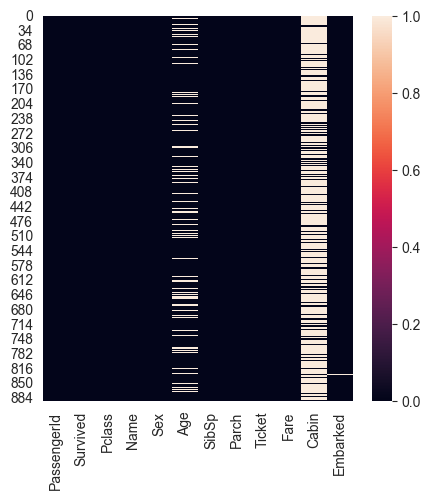

In [61]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.isnull(df))

In [73]:
plt.drop('Cabin',axis=1,inplace=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'drop'

In [ ]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

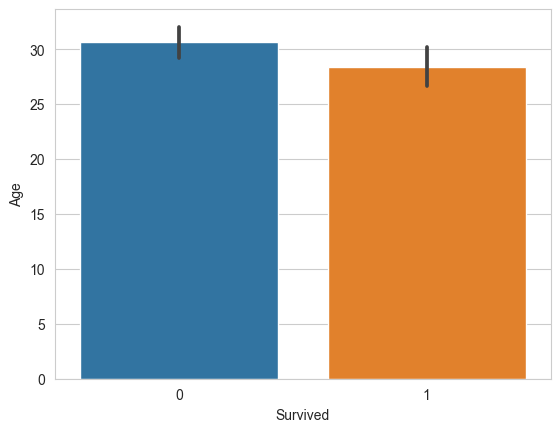

In [ ]:
sns.barplot(data=df, x='Survived',y='Age')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].fillna(df['Age'].mean()).mean()

29.69911764705882

In [ ]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

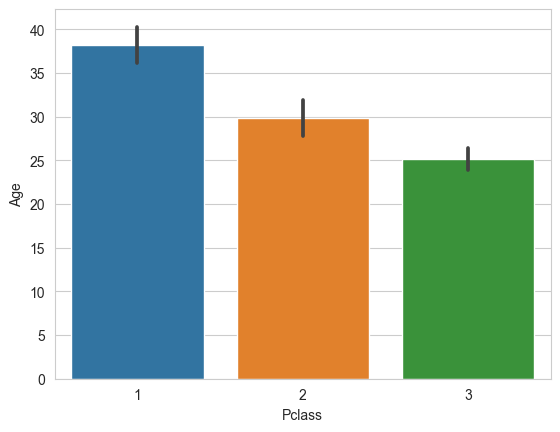

In [ ]:
sns.barplot(data=df,y='Age',x='Pclass')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
target_col='Survived'
cat_cols=['Pclass','Sex','Embarked']
num_cols=['Age','SibSp','Parch','Fare']
drop_cols=['Passengers','Name']

## Univariate analysis

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


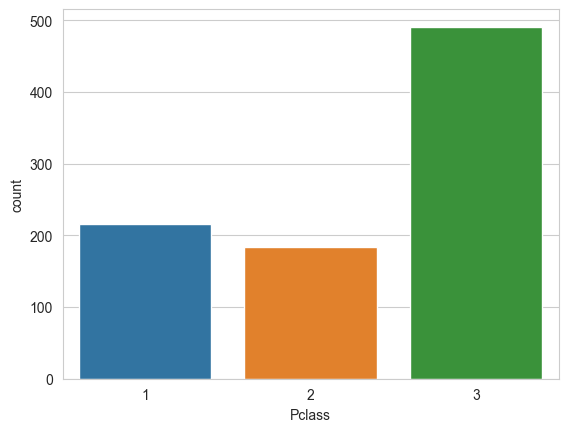

Sex
male      577
female    314
Name: Sex, dtype: int64


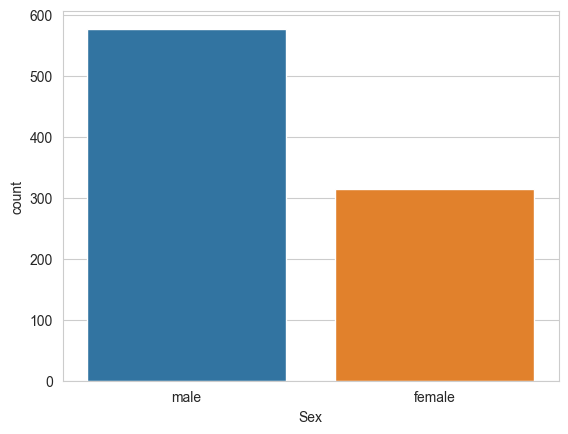

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


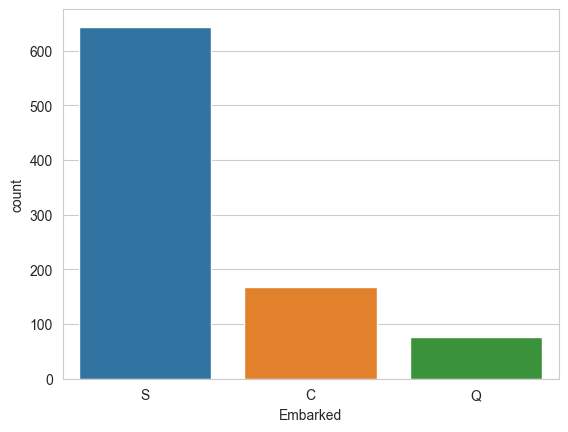

In [ ]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts())
    sns.countplot(data=df,x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

## Bivariate analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


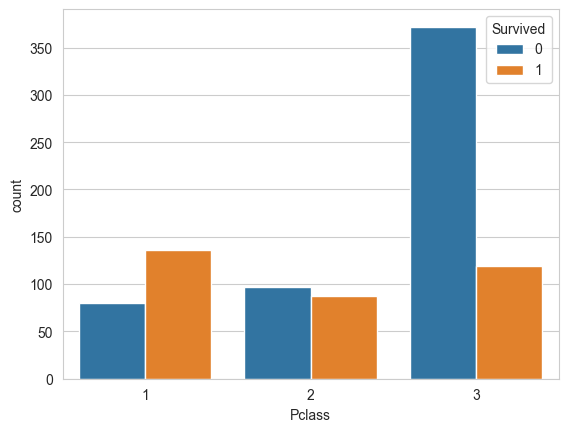

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


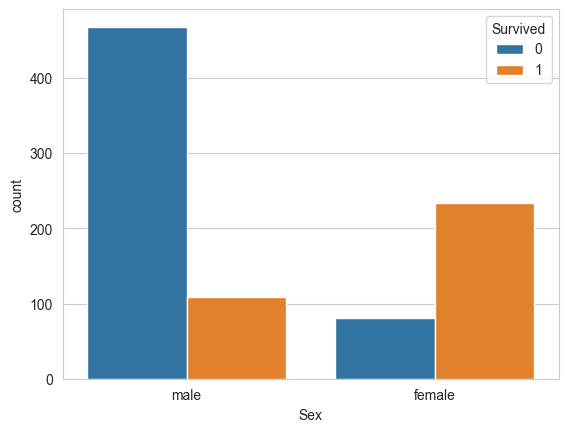

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


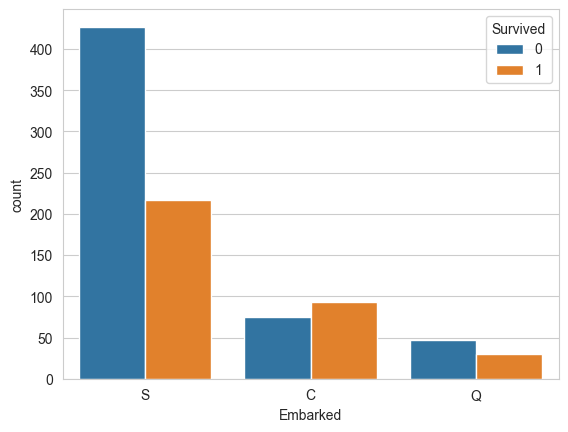

In [ ]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()

for col in cat_cols:
    cat_bivariate(col)

<AxesSubplot: >

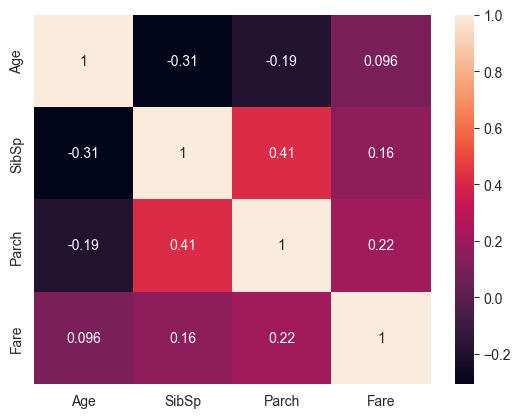

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True)

Age


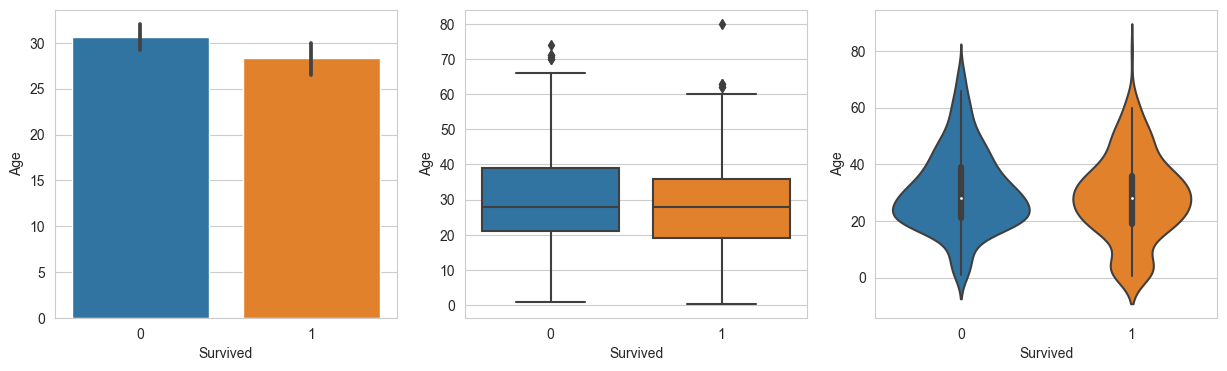

SibSp


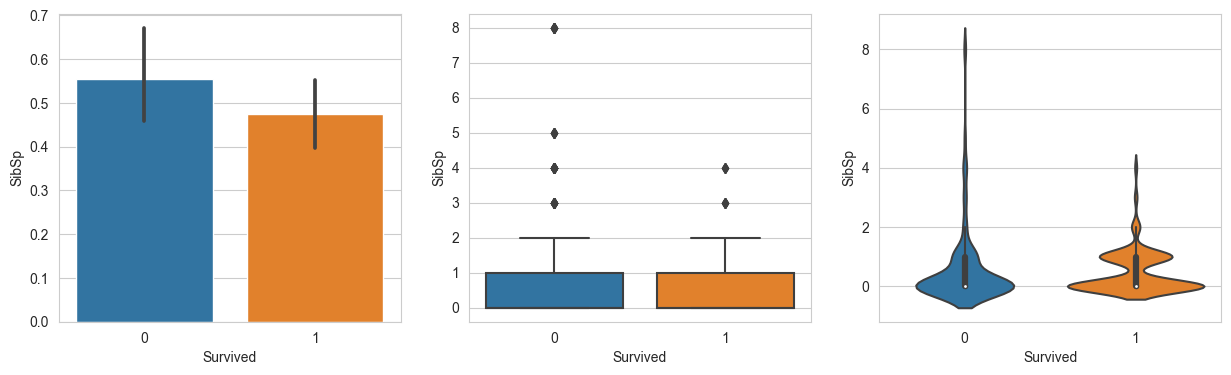

Parch


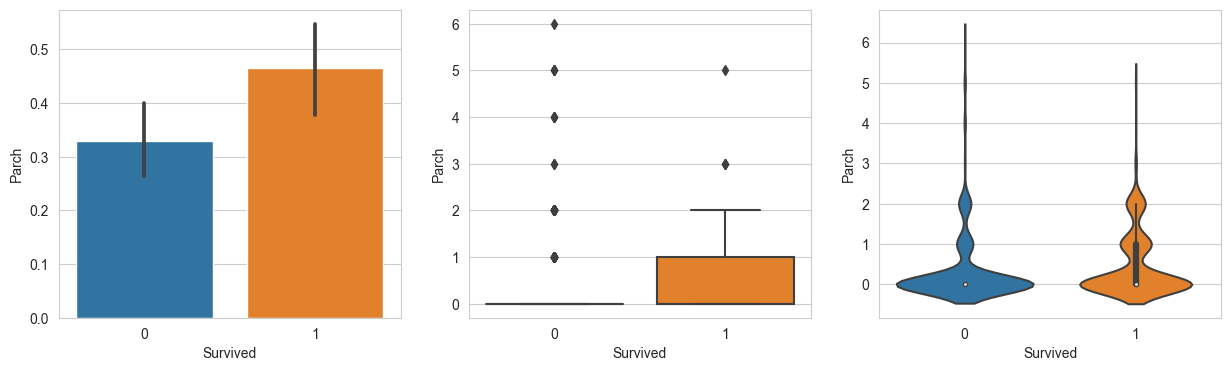

Fare


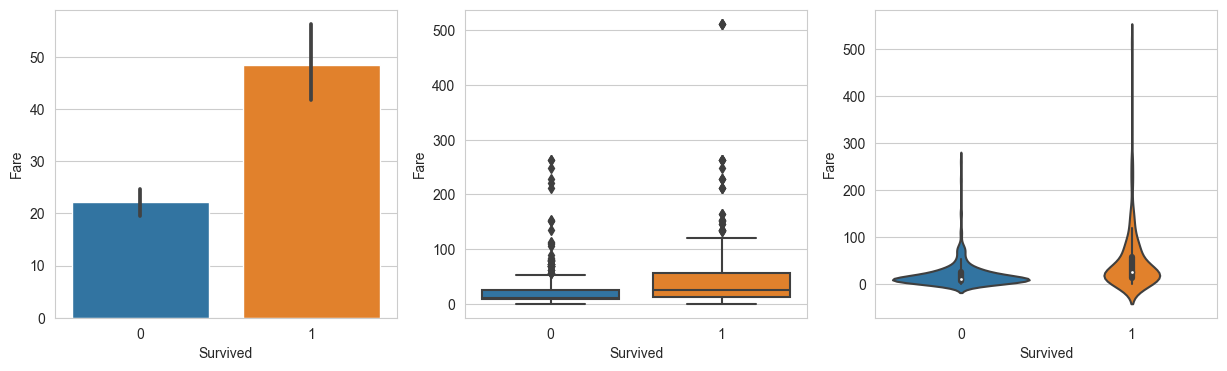

In [ ]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col,y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)



## Multivariate

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
#impute the fake entries

def age_imputer(data):
    age=data['Age']
    pclass=data['Pclass']
    sex=data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&[df['Sex']==sex].mean()]
    else:
        return age

df['Age']=df.apply(age_imputer,axis=1)






AttributeError: 'list' object has no attribute 'mean'

# Machine Learning Template

## Data splitting

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(test_size=0.25,random_state=101)


ValueError: At least one array required as input

## Model Creation & Training


In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

NameError: name 'xtrain' is not defined

In [68]:
print(round(100*model.score(xtest,ytest)),'%')

NameError: name 'model' is not defined